Salário x limite de Empréstimo

https://www.youtube.com/watch?v=75xRtlEQbiE&list=PLLWTDkRZXQa9ilj1HmPOtlzxs6Q8HQHPi&index=6

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')

In [3]:
data.head(3)

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822


In [4]:
data.tail(3)

,Salario,Limite_Emprestimo
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [8]:
data.dtypes

Salario              float64
Limite_Emprestimo    float64
dtype: object

In [9]:
data.isnull()

,Salario,Limite_Emprestimo
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
94,False,False
95,False,False
96,False,False
97,False,False


In [10]:
data.isnull().sum()

Salario              0
Limite_Emprestimo    0
dtype: int64

<Axes: >

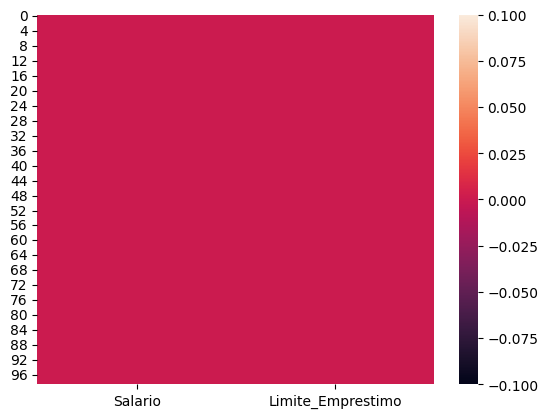

In [11]:
sns.heatmap(data.isnull())

<Axes: >

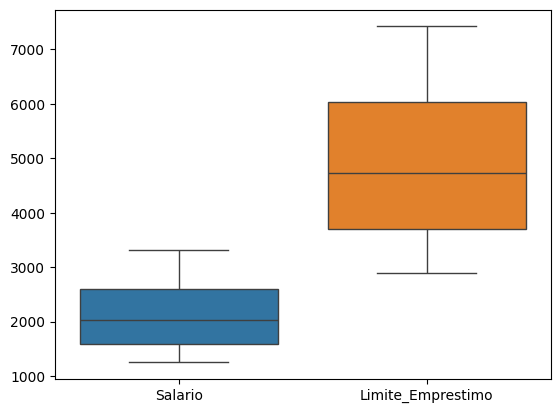

In [12]:
sns.boxplot(data)

In [13]:
data.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [14]:
data.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [15]:
# Converter para Array
Eixo_x = data.iloc[:,0].values
Eixo_y = data.iloc[:,1].values

In [16]:
Eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

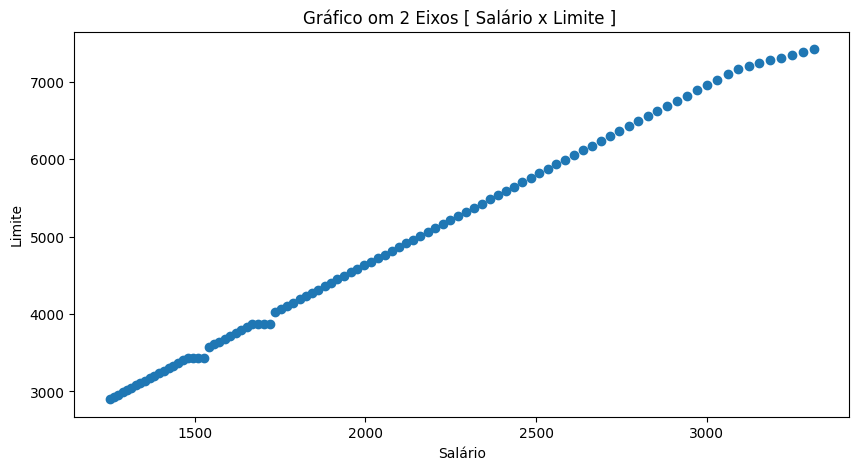

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(Eixo_x, Eixo_y)
plt.title('Gráfico om 2 Eixos [ Salário x Limite ] ')
plt.xlabel('Salário')
plt.ylabel('Limite');

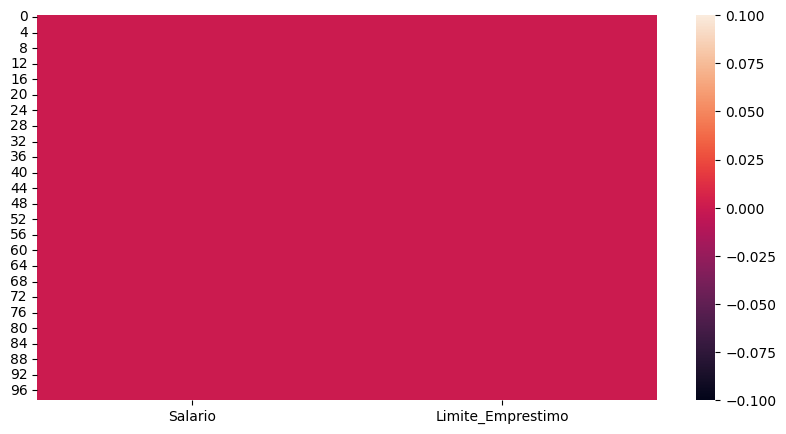

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull());

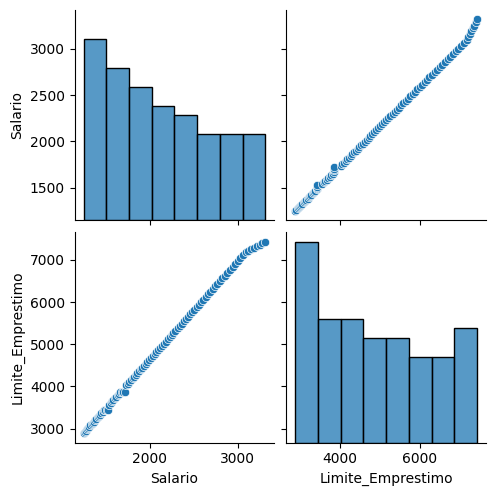

In [24]:
sns.pairplot(data);

In [25]:
Correlacao = np.corrcoef(Eixo_x, Eixo_y)
Correlacao

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

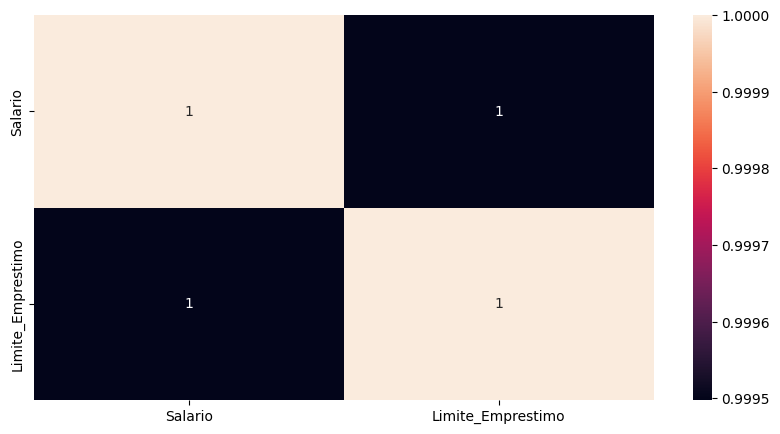

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True);

In [27]:
# Convertendo para matri
Eixo_x = Eixo_x.reshape(-1,1)
Eixo_y = Eixo_y.reshape(-1,1)

In [28]:
# Modelo - Divisão do Modelo
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_Test, y_train, y_test = train_test_split(Eixo_x, Eixo_y, test_size=0.30, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Quanto essas variáveis explicaram
model.score(X_train, y_train)

0.9990110184484953

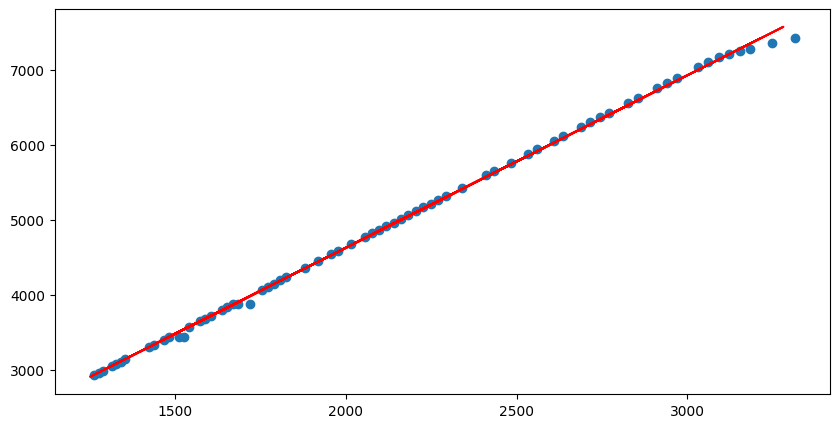

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train)
plt.plot(X_Test, model.predict(X_Test), color='red')

In [40]:
previsoes = model.predict(X_Test)

In [41]:
from sklearn import metrics

In [42]:
# Erro Médio da Regressão
# informa o quão concentrados os dados estão em torno da linha de melhor ajuste.
# tipo de medida de acurácia
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, previsoes)))

RMSE 44.69838660247507


In [44]:
# Tendo o salário x, quanto seria o limite de Empréstimo?
print(model.predict([[1800]]))

[[4168.9200308]]
